# Data distributions

Jaime Lopez - Feb. 2020

Usually, the first step to deal with a dataset is exploring how it is distributed. That is, for each one of its attributes, dividing the range between its maximum and minumun values in intervals and counting how many observations fall in each one of them.

In this notebook it is shown how to visualize or estimate data distributions using the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris) as an example. The Iris dataset has four attributes: sepal length, sepal width, petal length, and petal width, all of them measured in centimeters; and there are three classes: iris-setosa, iris-versicolour, and iris-virginica

In [9]:
# Loading libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import datasets
from scipy import stats
import seaborn as sns

In [2]:
# Loading the dataset
iris = datasets.load_iris()
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']
colors = [c for c in mcolors.TABLEAU_COLORS]
n = len(labels)

One way to visualize data distributions is using histograms.

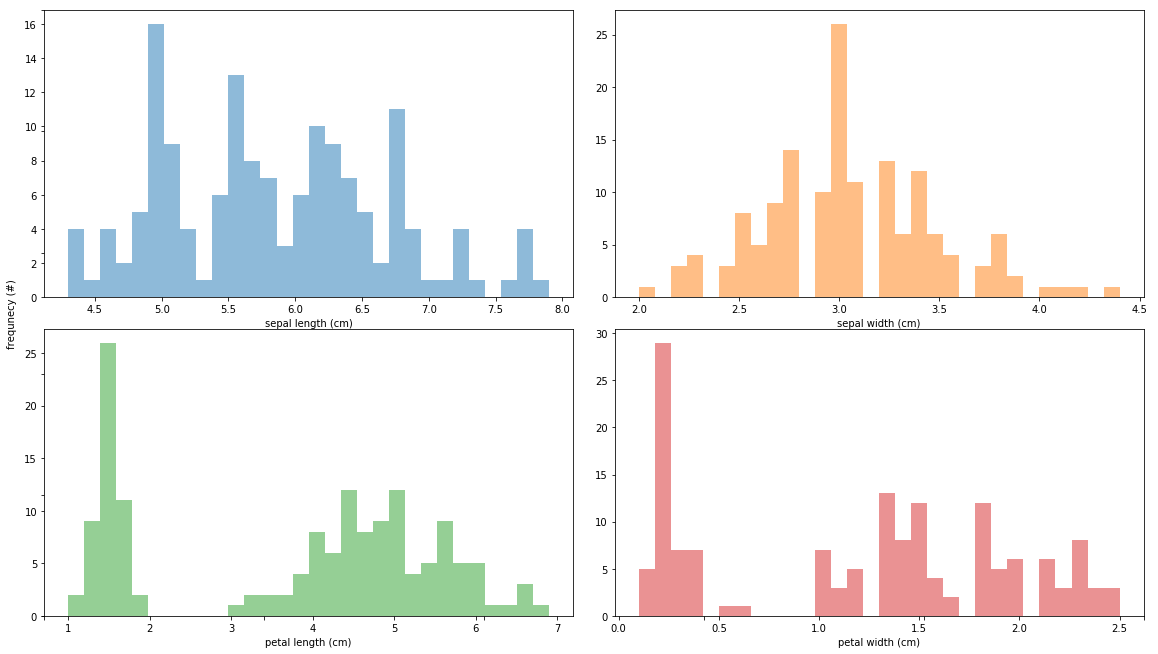

In [3]:
attributes = [el for el in zip(labels, range(4))]
fig, ax = plt.subplots(2, 2, figsize=(16, 9))
fig.tight_layout()
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none')
plt.ylabel('frequnecy (#)')
for i in [0, 1]:
    for j in [0, 1]:
        attr = i * 2 + j
        ax[i, j].hist(iris.data[:, attr], color=colors[attr], bins=30, alpha=0.5)
        ax[i, j].set_xlabel('{} (cm)'.format(attributes[attr][0]))


Furthermore, boxplots are useful to compare distribution of two or more attributes.

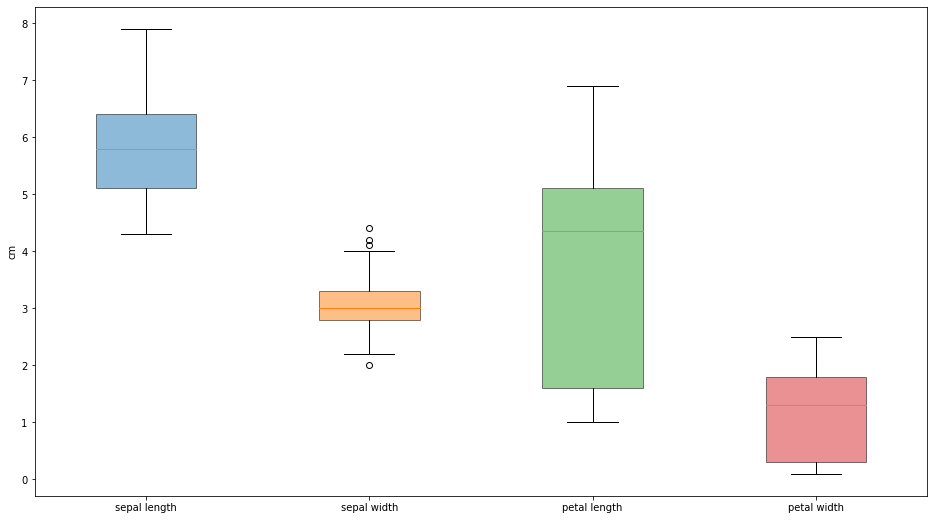

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
res = ax.boxplot(iris.data, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_ylabel('cm')
for box, color in zip(res['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.5)

More useful can be to have approximated curves to represent data distributions.

Text(0, 0.5, 'frequency (#)')

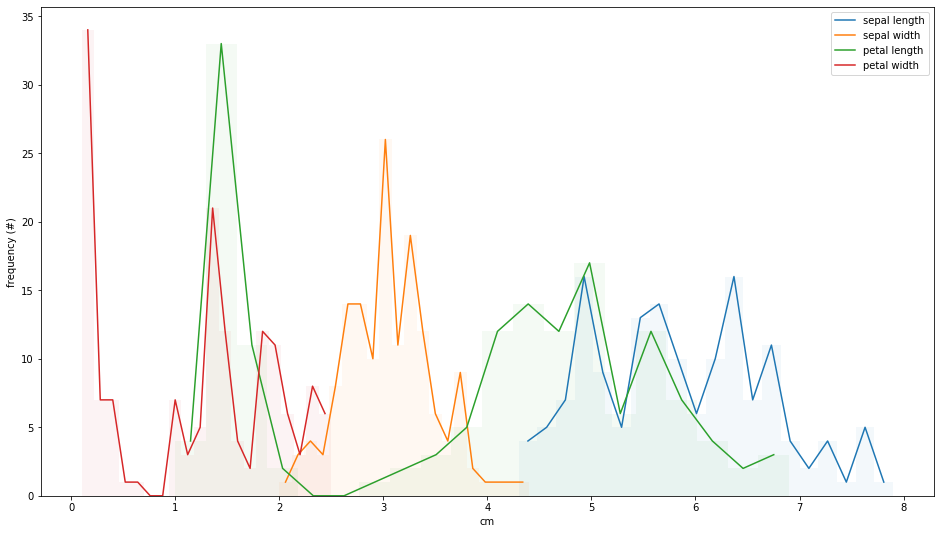

In [5]:
bins = 20
plt.figure(figsize=(16, 9))
dist = [np.histogram(iris.data[:, i], bins=bins) for i in range(n)]
for i in range(n):
    serie = dist[i]
    off = (serie[1][1] - serie[1][0]) / 2
    plt.plot(serie[1][:-1] + off, serie[0], color=colors[i], label=labels[i])
    plt.hist(iris.data[:, i], bins=bins, alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('frequency (#)')

A more advanced inquiry is estimating kernel density functions (KDE) for every distribution.

Text(0, 0.5, 'relative frequency')

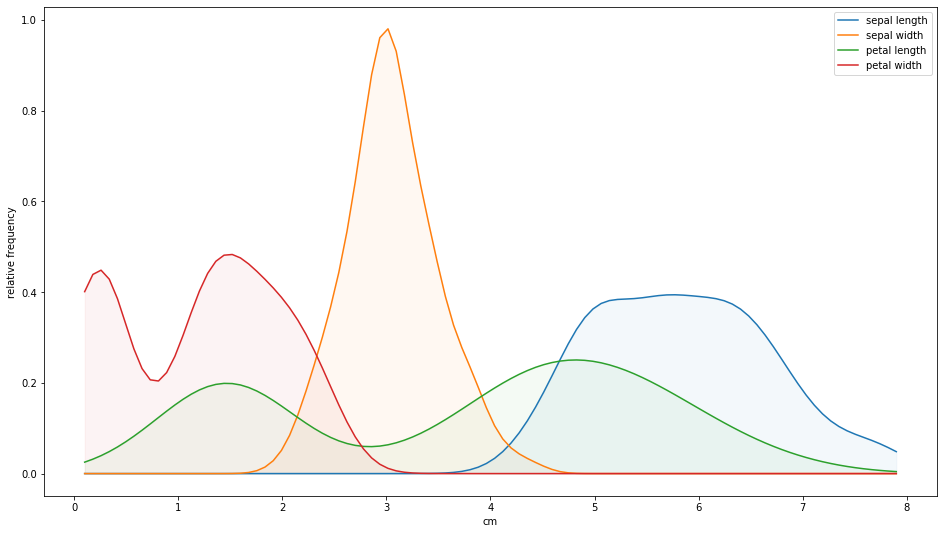

In [6]:
bins = 100
plt.figure(figsize=(16, 9))
x = np.linspace(iris.data.min(), iris.data.max(), bins)
for i in range(n):
    serie = iris.data[:, i]
    KDE = stats.gaussian_kde(serie)
    y = KDE(x)
    plt.plot(x, y, label=labels[i], color=colors[i])
    plt.fill_between(x, 0, y, color=colors[i], alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('relative frequency')

Other way to explore data is using cummulative distributions.

Text(0, 0.5, 'relative frequency')

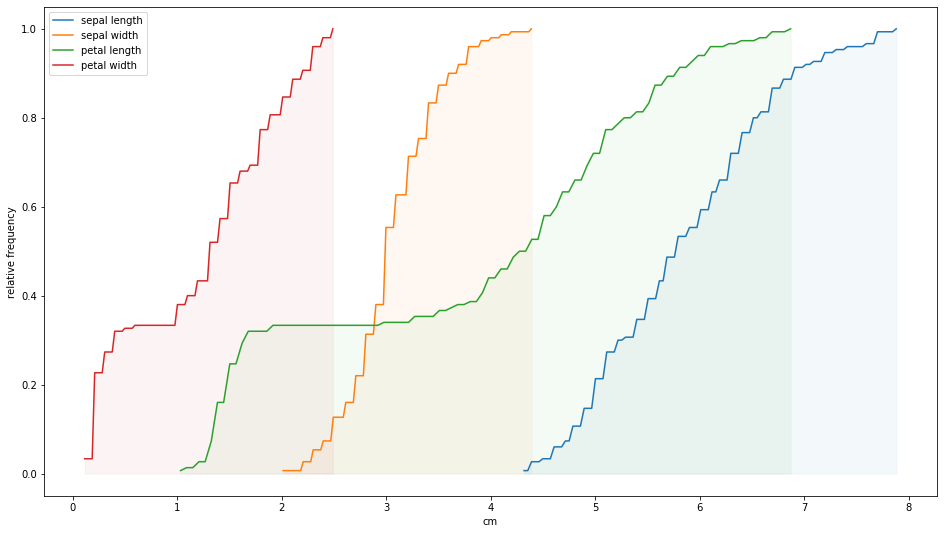

In [7]:
bins = 100
plt.figure(figsize=(16, 9))
dist = [np.histogram(iris.data[:, i], bins=bins) for i in range(n)]
for i in range(n):
    serie = dist[i]
    off = (serie[1][1] - serie[1][0]) / 2
    x = serie[1][:-1] + off
    y = np.add.accumulate(serie[0]) / serie[0].sum()
    plt.plot(x, y, color=colors[i], label=labels[i])
    plt.fill_between(x, 0, y, color=colors[i], alpha=0.05)
plt.legend()
plt.xlabel('cm')
plt.ylabel('relative frequency')